# Data Analysis of the TMDB Dataset

![title](https://m.media-amazon.com/images/G/01/imdb/images/social/imdb_logo._CB41090\1634_.png)

In [2]:
#Altering display on Jupyter Notebook for convenience
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

## First we need to import all files that we will be needing to execute our code
We will import the csv file and store it in a variable. We'll also create a second variable in order to store the original data before we make changes to 'df_movies' dataset.
We import:
- pandas: to access and manipulate df
- matplotlib: to visualise the data
- numpy: to perform mathematical operations
- scipy: to find z-score in order to remove outliers from our data

In [3]:
#Importing important libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from pandas.plotting import scatter_matrix
from scipy import stats
%matplotlib inline 

In [4]:
#Reading the CSV file locally, creating an orignal df, before making changes.
df_movies = pd.read_csv("tmdb-movies.csv") 
df_tmdb = df_movies

## Data Preprocessing

In data for preprocessing, we have to ensure that our dataset is perfect for analysis. We see that datetime has incorrect format, and it needs be rectified. We also have a lot of columns that we will not be needing during the analysis phase. Those should be dropped as well. 

Some of the rows have values which have no use to us, such as rows that are duplicate, hence have redundant data, rows with value zeroes in certain columns, (which act as noise), and rows with na values. Since all of the questions we will be answering are the ones that only require us to find general trend, we do not need to carry these rows, and can drop them to make our jobs easier.

On further analysis, some other changes have also been made to the dataframe to make our work easier, and these shall be discussed further into the report!

In [5]:
#Glancing at all columns
for i,v in enumerate(df_movies.columns):
    print(i,v)

0 id
1 imdb_id
2 popularity
3 budget
4 revenue
5 original_title
6 cast
7 homepage
8 director
9 tagline
10 keywords
11 overview
12 runtime
13 genres
14 production_companies
15 release_date
16 vote_count
17 vote_average
18 release_year
19 budget_adj
20 revenue_adj


In [6]:
#Dropping unnecessary columns
col_drop = ['id', 'imdb_id', 'budget', 'revenue', 'homepage', 'keywords', 'overview', 'production_companies', 'vote_count', 'vote_average','tagline','cast','director']
df_movies.drop(col_drop,inplace=True,axis=1)

We have only kept the columns that will be required to answer the questions we will pose. We also remove budget and revenue since we'll only be needing the values adjusted for inflation.

In [7]:
#Verifying changes
for i,v in enumerate(df_movies.columns):
    print(i,v)

0 popularity
1 original_title
2 runtime
3 genres
4 release_date
5 release_year
6 budget_adj
7 revenue_adj


In [8]:
df_movies.head()

,popularity,original_title,runtime,genres,release_date,release_year,budget_adj,revenue_adj
0,32.985763,Jurassic World,124,Action|Adventure|Science Fiction|Thriller,6/9/15,2015,1.379999e+08,1.392446e+09
1,28.419936,Mad Max: Fury Road,120,Action|Adventure|Science Fiction|Thriller,5/13/15,2015,1.379999e+08,3.481613e+08
2,13.112507,Insurgent,119,Adventure|Science Fiction|Thriller,3/18/15,2015,1.012000e+08,2.716190e+08
3,11.173104,Star Wars: The Force Awakens,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,2015,1.839999e+08,1.902723e+09
4,9.335014,Furious 7,137,Action|Crime|Thriller,4/1/15,2015,1.747999e+08,1.385749e+09


In [9]:
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 8 columns):
popularity        10866 non-null float64
original_title    10866 non-null object
runtime           10866 non-null int64
genres            10843 non-null object
release_date      10866 non-null object
release_year      10866 non-null int64
budget_adj        10866 non-null float64
revenue_adj       10866 non-null float64
dtypes: float64(3), int64(2), object(3)
memory usage: 679.2+ KB


In [10]:
#Changing datatype of release data from string to datetime
df_movies.release_date = pd.to_datetime(df_movies['release_date'])

In [11]:
#Finding the duplicated rows in the dataframe
df_movies[df_movies.duplicated()]

,popularity,original_title,runtime,genres,release_date,release_year,budget_adj,revenue_adj
2090,0.59643,TEKKEN,92,Crime|Drama|Action|Thriller|Science Fiction,2010-03-20,2010,30000000.0,967000.0


In [12]:
#Checking for dupliactes in df
df_movies.isnull().values.any()

True

In [13]:
#Removing all 0s in budget_adj and revenue_adj
df_movies.replace(0,np.NAN,inplace=True)

In [14]:
#Removing all na rows
df_movies.dropna(inplace=True)

In [15]:
#Checking for all null values
df_movies.isnull().values.any()

False

In [16]:
#Dropping all duplicates, should return no rows
df_movies.drop_duplicates(inplace=True)
df_movies[df_movies.duplicated()]

,popularity,original_title,runtime,genres,release_date,release_year,budget_adj,revenue_adj


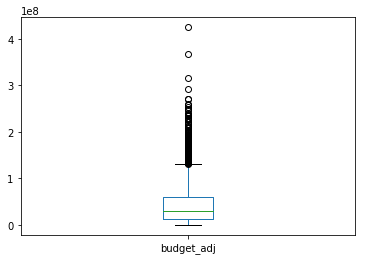

In [17]:
#Visualising distribution of budget column
df_movies['budget_adj'].plot(kind='box')

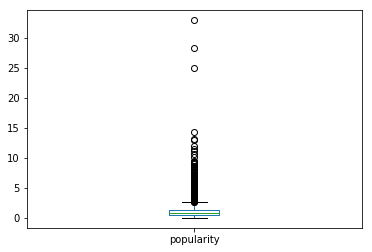

In [18]:
#Visualising distribution of popularity column
df_movies['popularity'].plot(kind='box')

By visualising the the two distributions, we are able to conclude that this dataset has a lot of outliers and hence it is prudent to remove them to improve our Analysis further down the pipeline

In [19]:
df_movies.shape

(3854, 8)

In [20]:
z_scores = stats.zscore(df_movies[['popularity','runtime','budget_adj','revenue_adj']])
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
df_new = df_movies[filtered_entries]

In [21]:
df_new.shape

(3638, 8)

In [22]:
#Creating a new column called profit. Profit column is created by suctracting revenue by budget.
df_new['profit'] = pd.DataFrame(df_movies.revenue_adj - df_movies.budget_adj) 

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


Now we can finally view the result we have after performing all the preproccessing of the data performed till now.

In [23]:
df_new.describe()

,popularity,runtime,release_year,budget_adj,revenue_adj,profit
count,3638.000000,3638.000000,3638.000000,3.638000e+03,3.638000e+03,3.638000e+03
mean,1.013486,107.334250,2001.309511,3.945078e+07,1.080945e+08,6.864370e+07
std,0.841891,16.464738,11.030209,3.663366e+07,1.384549e+08,1.214216e+08
min,0.001117,62.000000,1960.000000,9.693980e-01,2.370705e+00,-1.375868e+08
25%,0.449147,95.000000,1995.250000,1.253202e+07,1.701959e+07,-2.350754e+06
50%,0.774555,105.000000,2004.000000,2.804050e+07,5.633007e+07,2.357174e+07
75%,1.285252,117.000000,2010.000000,5.541697e+07,1.421590e+08,9.192575e+07
max,5.573184,168.000000,2015.000000,1.778701e+08,7.839013e+08,7.568899e+08


In [24]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3638 entries, 17 to 10848
Data columns (total 9 columns):
popularity        3638 non-null float64
original_title    3638 non-null object
runtime           3638 non-null float64
genres            3638 non-null object
release_date      3638 non-null datetime64[ns]
release_year      3638 non-null int64
budget_adj        3638 non-null float64
revenue_adj       3638 non-null float64
profit            3638 non-null float64
dtypes: datetime64[ns](1), float64(5), int64(1), object(2)
memory usage: 284.2+ KB


Creating a function to assist in binning numeric variable and naming the bins. However, we only do this for one column.

Later on this will help us in making coclusions about the data.

In [25]:
def discretization(col_name,bins,labels):
    df_new[col_name + '_disc'] = pd.cut(df_new[col_name],bins=bins,labels=labels)

In [26]:
bins = [0.001117, 0.450901, 0.775201, 1.285155, 5.573184]
labels = ['Poor', 'Below Average', 'Average','Popular']
discretization(col_name="popularity", bins=bins, labels=labels)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [27]:
#Viewing the final prodcut of our preprocessing
df_new.describe()

,popularity,runtime,release_year,budget_adj,revenue_adj,profit
count,3638.000000,3638.000000,3638.000000,3.638000e+03,3.638000e+03,3.638000e+03
mean,1.013486,107.334250,2001.309511,3.945078e+07,1.080945e+08,6.864370e+07
std,0.841891,16.464738,11.030209,3.663366e+07,1.384549e+08,1.214216e+08
min,0.001117,62.000000,1960.000000,9.693980e-01,2.370705e+00,-1.375868e+08
25%,0.449147,95.000000,1995.250000,1.253202e+07,1.701959e+07,-2.350754e+06
50%,0.774555,105.000000,2004.000000,2.804050e+07,5.633007e+07,2.357174e+07
75%,1.285252,117.000000,2010.000000,5.541697e+07,1.421590e+08,9.192575e+07
max,5.573184,168.000000,2015.000000,1.778701e+08,7.839013e+08,7.568899e+08


In [28]:
df_new.sample(5)

,popularity,original_title,runtime,genres,release_date,release_year,budget_adj,revenue_adj,profit,popularity_disc
8726,0.627609,Thirteen Days,145.0,Drama|Thriller,2000-12-24,2000,1.013034e+08,4.377160e+07,-5.753177e+07,Below Average
5098,0.366218,Swimming Pool,102.0,Thriller|Crime,2003-05-18,2003,9.245751e+06,2.660088e+07,1.735513e+07,Poor
8396,0.473893,Porky's,94.0,Comedy,1981-11-13,1981,9.592763e+06,3.015204e+08,2.919276e+08,Below Average
10095,0.257865,Mermaids,110.0,Comedy|Drama|Romance,1990-12-14,1990,5.173585e+07,5.911138e+07,7.375525e+06,Poor
4123,0.214587,Possession,102.0,Drama|Mystery,2002-10-02,2002,3.030653e+07,1.226049e+07,-1.804605e+07,Poor


# Exploration Part and Research

## The questions we are asking in this section are:
- What is the relation between runtime and popularity?
- How does the budjet affect the popularity of a movie ? 
- Do more popular movies tend to make more profit ?
- How much do movies typically earn ?
- What is the trend surrounding movie earnings?

## Q. What is the relation between runtime and popularity

In [29]:
#Function has been added to avoid repetition in the code below and enhance readability of the code in general.
def scatter(x,y,title,xlab,ylab):
    plt.scatter(df_new[x],df_new[y])
    plt.title(title)
    plt.xlabel(xlab)
    plt.ylabel(ylab)

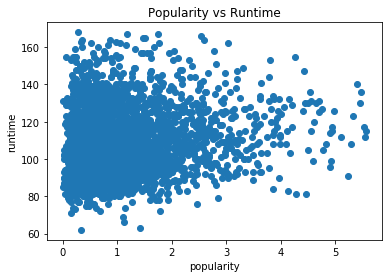

In [30]:
scatter('popularity', 'runtime', 'Popularity vs Runtime', 'popularity', 'runtime')

In [31]:
df_new.groupby('popularity_disc').runtime.agg(['count','min','max','mean'])

,count,min,max,mean
popularity_disc,,,,
Poor,914,62.0,168.0,104.580963
Below Average,906,72.0,162.0,106.458057
Average,907,66.0,167.0,107.224917
Popular,910,63.0,167.0,111.105495


In [32]:
np.corrcoef(df_new['popularity'],df_new['runtime'])

array([[1.        , 0.16668123],
       [0.16668123, 1.        ]])

 >  The above analysis indicates very weak positive correlation between runtime and popularity. There are a lot of data points from 80 minutes to 135 minutes, and 0 to 2 in popularity,  

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000017138B828D0>]],
      dtype=object)

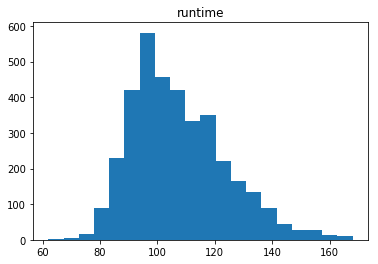

In [33]:
df_new.hist(column='runtime',grid=False,bins=20)

## Q. How does the budjet affect the popularity of a movie ? 

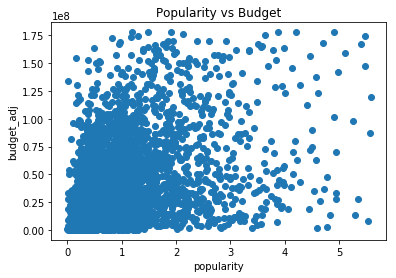

In [34]:
scatter('popularity', 'budget_adj', 'Popularity vs Budget', 'popularity', 'budget_adj')

In [35]:
np.corrcoef(df_new['popularity'],df_new['budget_adj'])

array([[1.        , 0.38361125],
       [0.38361125, 1.        ]])

>   In this case, we can observe a partial positive correlation between these attributes. However, most data points are concentrated between 0 and 2 in popularity and 0 to 0.50 in budget. 

## Q. Do more popular movies tend to make more profit ?

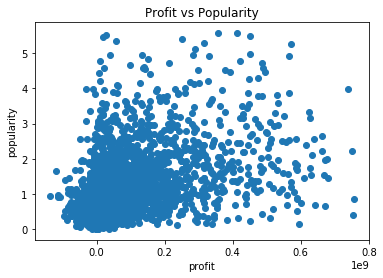

In [36]:
scatter('profit', 'popularity', 'Profit vs Popularity', 'profit', 'popularity')

In [37]:
np.corrcoef(df_new['profit'],df_new['popularity'])

array([[1.        , 0.48129546],
       [0.48129546, 1.        ]])

>   Again, we can observe a partial positive correlation between these attributes. Though most movies have higher popularity in case of a higher budget, some others do not show the same trend.

## Q. What is the trend surrounding movie earnings?

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000011F287C6128>]],
      dtype=object)

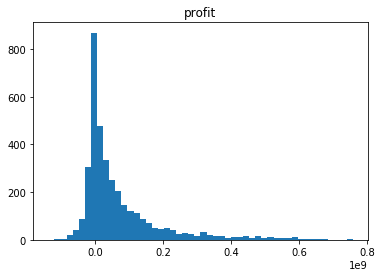

In [36]:
df_new.hist(column='profit',grid=False,bins=50)

>    From above, we can see that most movies earn just above their break-even point, and significanlty less movies suffer losses. Also, the graph is heavily skewed to the right, indicating that movies do not usually have a huge profit margin.

# Conclusions

- Very weak positive correlation between runtime and popularity.
- Partial positive correlation between Popularity and Budget attributes.
- Partial positive correlation between Budget and Profit.
- Most movies earn somewhere around their breakeven point.
- Significanlty low amount of movies suffer losses

# Limitations

- Though the analysis shows certain trends, a movie simply containing the attributes of other similar movies will not guarentee that it does well.
- Number of movies which came out recently, heavily outnumber older one's, thus, findings may not be as applicable to older movies.
- Hollywood movies receive higher representation in the dataset, trends in other movie industries cannot be sufficiently isolated using this dataset.
- We do not know the currency denominations in budget and revenue columns which may lead to erroneous conclusions.
- We have not made use of rows with missing values or rows with 0 values, which may have influenced results. 

## Credit

1. How to remove outliers from a Pandas DataFrame in Python - https://www.kite.com/python/answers/how-to-remove-outliers-from-a-pandas-dataframe-in-python